In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Loan_Data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Drop unnecessary columns
df = df.drop(['Loan_ID'], axis = 1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
# Checking if there is empty or NAN values in dataset
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

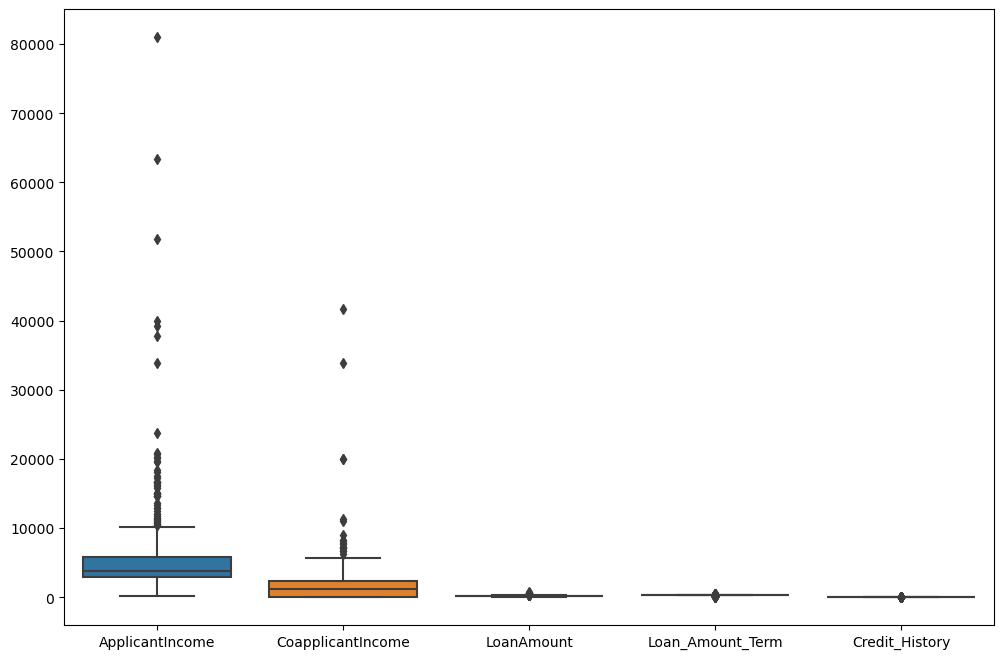

In [10]:
# Checking the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [11]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
# Filling the null values of numerical datatype
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [13]:
# Filling the null values of object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# Calculating the unique number of values in each column
for column_name in df.columns:
    unique_values_count = len(df[column_name].unique())
    print(f"{column_name} - {unique_values_count}")

Gender - 2
Married - 2
Dependents - 4
Education - 2
Self_Employed - 2
ApplicantIncome - 505
CoapplicantIncome - 287
LoanAmount - 203
Loan_Amount_Term - 11
Credit_History - 3
Property_Area - 3
Loan_Status - 2


In [16]:
# Explore the data and understand the distribution of values in each column
for column_name, column_data in df.items():
    print(column_data.value_counts())

Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64
LoanAmount
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
12

Number of people taking loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

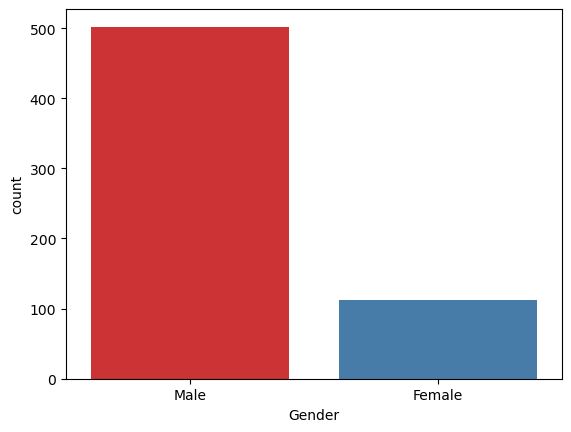

In [17]:
print('Number of people taking loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df, palette='Set1')

Number of people taking loan by Married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

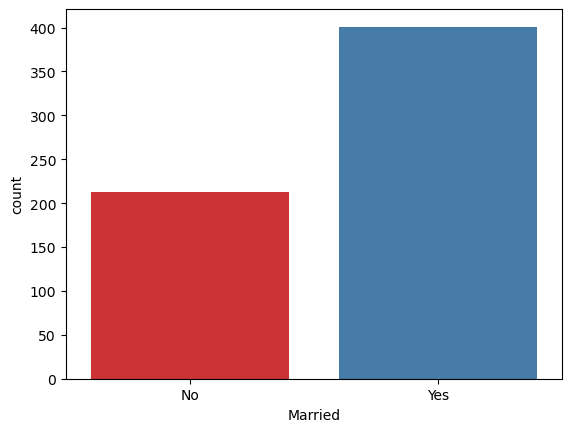

In [18]:
print('Number of people taking loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df, palette='Set1')

Number of people taking loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

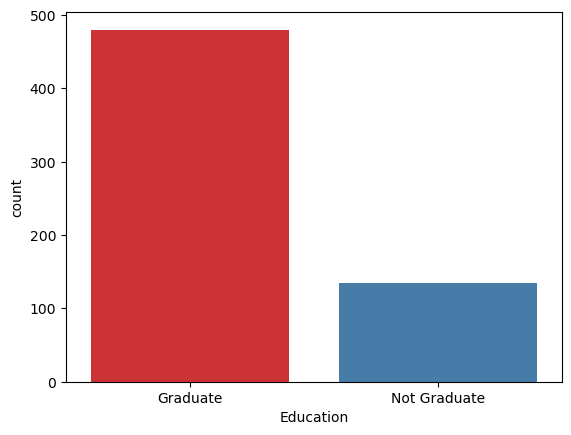

In [19]:
print('Number of people taking loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df, palette='Set1')

In [20]:
# Total Applicant Income

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

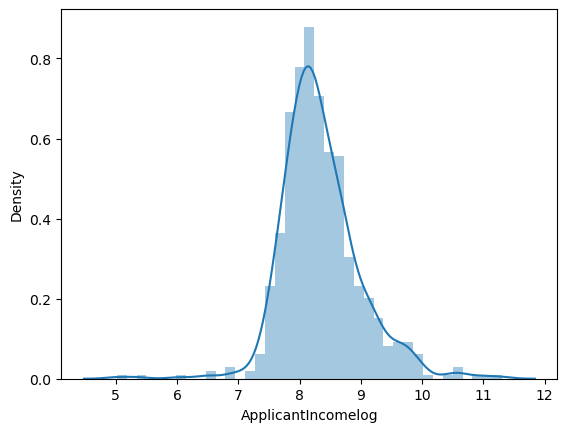

In [21]:
# Applying Log Transformation

df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomelog'])

<Axes: xlabel='CoapplicantIncomelog', ylabel='Density'>

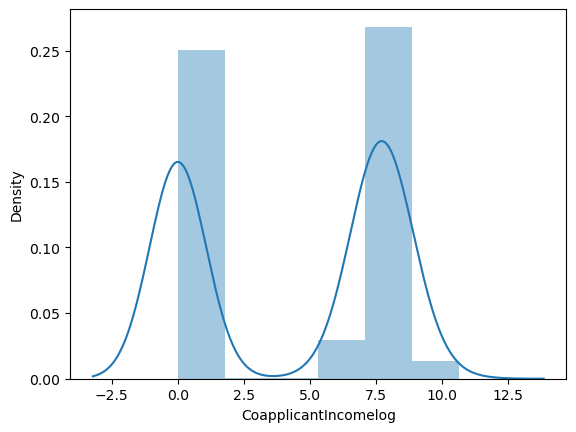

In [22]:
df['CoapplicantIncomelog'] = np.log(df['CoapplicantIncome'] + 1)
sns.distplot(df['CoapplicantIncomelog'])

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

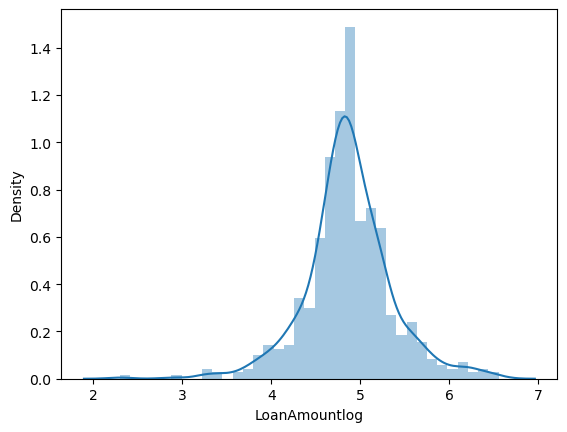

In [23]:
df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

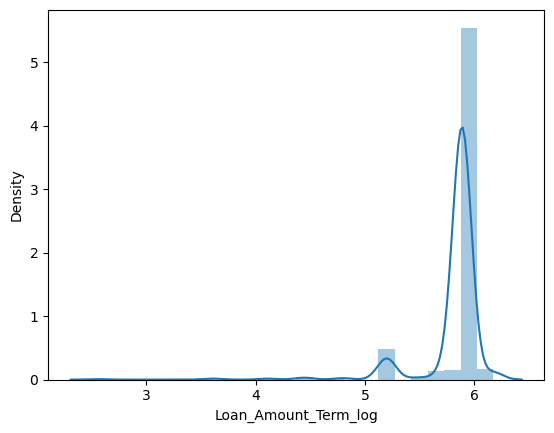

In [24]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_log'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

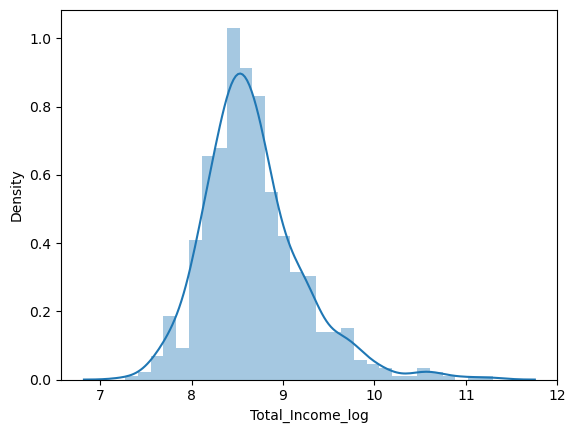

In [25]:
df['Total_Income_log'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_Income_log'])

In [26]:
# dropping unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,0.000000,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,7.319202,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,0.000000,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,7.765993,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,0.000000,4.955827,5.888878,8.699681


In [27]:
# Converting categorical values into unique integer values

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le =  LabelEncoder()
for col in cols:
  df[col] =  le.fit_transform(df[col])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,0.000000,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,7.319202,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,0.000000,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,7.765993,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,0.000000,4.955827,5.888878,8.699681


In [28]:
# # Replace '3+' with 4
# df.replace('3+', 4, inplace=True)

In [29]:
# Explore the data and understand the distribution of values in each column
for column_name, column_data in df.items():
    print(column_data.value_counts())

Gender
1    502
0    112
Name: count, dtype: int64
Married
1    401
0    213
Name: count, dtype: int64
Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64
Education
0    480
1    134
Name: count, dtype: int64
Self_Employed
0    532
1     82
Name: count, dtype: int64
Credit_History
1.000000    475
0.000000     89
0.842199     50
Name: count, dtype: int64
Property_Area
1    233
2    202
0    179
Name: count, dtype: int64
Loan_Status
1    422
0    192
Name: count, dtype: int64
ApplicantIncomelog
7.824446    9
8.430327    6
8.699681    6
7.863651    6
8.111928    5
           ..
8.084871    1
8.391403    1
8.273337    1
8.292298    1
8.933796    1
Name: count, Length: 505, dtype: int64
CoapplicantIncomelog
0.000000    273
7.824446      5
7.642044      5
7.418781      5
7.719130      3
           ... 
7.934513      1
6.918695      1
7.436028      1
7.862882      1
5.484797      1
Name: count, Length: 287, dtype: int64
LoanAmountlog
4.859812    33
4.795791    20
4.709530

In [30]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.012819,-0.025752,0.017987,0.084501,0.220579,0.143171,-0.054061,0.167277
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.005852,0.004257,0.091478,0.021444,0.317095,0.179841,-0.068724,0.151517
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,-0.037392,-0.000244,0.010118,0.115839,-0.000732,0.157109,-0.077430,0.112813
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.077936,-0.065243,-0.085884,-0.181735,0.043127,-0.146672,-0.065201,-0.204861
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,-0.002260,-0.030860,-0.003700,0.189847,-0.092308,0.109936,-0.026115,0.176709
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,1.000000,-0.001880,0.540483,0.019183,0.002384,-0.024067,-0.007773,0.019154
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.001880,1.000000,0.032112,-0.029501,-0.055183,-0.094812,-0.083800,-0.046240
Loan_Status,0.017987,0.091478,0.010118,-0.085884,-0.003700,0.540483,0.032112,1.000000,0.010959,0.060593,-0.038242,-0.007232,0.007232
ApplicantIncomelog,0.084501,0.021444,0.115839,-0.181735,0.189847,0.019183,-0.029501,0.010959,1.000000,-0.368258,0.492819,-0.014723,0.740402
CoapplicantIncomelog,0.220579,0.317095,-0.000732,0.043127,-0.092308,0.002384,-0.055183,0.060593,-0.368258,1.000000,0.132697,0.012895,0.149070


In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (491, 12) (491,)
Testing data shape: (123, 12) (123,)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Calculate mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error: ", mse_linear)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred_linear)
print("R-squared (R2):" ,r2)

Linear Regression Mean Squared Error:  0.165527455726449
R-squared (R2): 0.2720160239286491


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
logistic_model = LogisticRegression(max_iter = 1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.7886178861788617


In [34]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(logistic_model, X, y, cv=5)
score

array([0.81300813, 0.77235772, 0.7804878 , 0.85365854, 0.81967213])

In [35]:
average_score = score.mean()
print("Average cross-validation score:", average_score)

Average cross-validation score: 0.8078368652538984


In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Initialize the model
degree = 2 # Set the degree of the polynomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

# Calculate mean squared error
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Polynomial Regression Mean Squared Error:", mse_poly)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred_linear)
print("R-squared (R2):", r2)

Polynomial Regression Mean Squared Error: 0.1833446660692303
R-squared (R2): 0.2720160239286491


In [37]:
from sklearn.svm import SVC

# Initialize the model
svc_model = SVC()

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc_model.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", accuracy_logistic)

SVC Accuracy: 0.7886178861788617


In [38]:
score = cross_val_score(svc_model,X,y,cv=5)
score

array([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68852459])

In [39]:
average_score = score.mean()
print("Average cross-validation score:", average_score)

Average cross-validation score: 0.6872984139677463


In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors = 3)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNeighbors Accuracy:", accuracy_logistic)


KNeighbors Accuracy: 0.7886178861788617


In [41]:
score = cross_val_score(knn_model,X,y,cv=5)
score

array([0.69918699, 0.72357724, 0.70731707, 0.69105691, 0.69672131])

In [42]:
average_score = score.mean()
print("Average cross-validation score:", average_score)

Average cross-validation score: 0.7035719045715046


In [43]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(logistic_model,y_test,y_pred_logistic)
generate_classification_report(svc_model,y_test,y_pred_svc)
generate_classification_report(knn_model,y_test,y_pred_knn)

Classification Report For LogisticRegression(max_iter=1000):
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Classification Report For SVC():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123


Classification Report For KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.59      0.30      0.40        43
           1       0.70      0.89      0.78        80

    accuracy           

Logistic Regression: Best overall performance with good precision and recall for class 1, but poor recall for class 0.
SVC: Fails to predict class 0 entirely, making it unsuitable for imbalanced datasets like this one.
KNeighborsClassifier: Balanced performance but not as strong as Logistic Regression, especially for class 0.

In [44]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [45]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(y_resampled,name="Loan_status")],axis=1)

In [46]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.000000,2,8.674197,0.000000,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,7.319202,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,0.000000,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,7.765993,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,0.000000,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,0.000000,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,0.000000,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,7.559038,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,0.000000,3.828641,5.198497,7.969012


In [47]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [48]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [49]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,test_size = 0.25,random_state=42)

In [50]:
# Initialize the model
logistic_model = LogisticRegression(max_iter = 1000)

# Train the model
logistic_model.fit(X_resampled_train,y_resampled_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_resampled_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_resampled_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.6919431279620853


In [51]:
# Initialize the model
svc_model = SVC()

# Train the model
svc_model.fit(X_resampled_train, y_resampled_train)

# Make predictions
y_pred_svc = svc_model.predict(X_resampled_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_resampled_test, y_pred_svc)
print("SVC Accuracy:", accuracy_logistic)

SVC Accuracy: 0.6919431279620853


In [52]:
# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors = 3)

# Train the model
knn_model.fit(X_resampled_train, y_resampled_train)

# Make predictions
y_pred_knn = knn_model.predict(X_resampled_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_resampled_test, y_pred_knn)
print("KNeighbors Accuracy:", accuracy_logistic)

KNeighbors Accuracy: 0.6919431279620853


In [53]:
generate_classification_report(logistic_model,y_resampled_test,y_pred_logistic)
generate_classification_report(svc_model,y_resampled_test,y_pred_svc)
generate_classification_report(knn_model,y_resampled_test,y_pred_knn)

Classification Report For LogisticRegression(max_iter=1000):
              precision    recall  f1-score   support

           0       0.86      0.52      0.64       114
           1       0.61      0.90      0.73        97

    accuracy                           0.69       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.69      0.68       211


Classification Report For SVC():
              precision    recall  f1-score   support

           0       0.96      0.41      0.58       114
           1       0.59      0.98      0.73        97

    accuracy                           0.67       211
   macro avg       0.77      0.70      0.66       211
weighted avg       0.79      0.67      0.65       211


Classification Report For KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       114
           1       0.74      0.69      0.71        97

    accuracy           

              precision    recall  f1-score   support

           0       0.86      0.52      0.64       114
           1       0.61      0.90      0.73        97

    accuracy                           0.69       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.69      0.68       211

[[59 55]
 [10 87]]


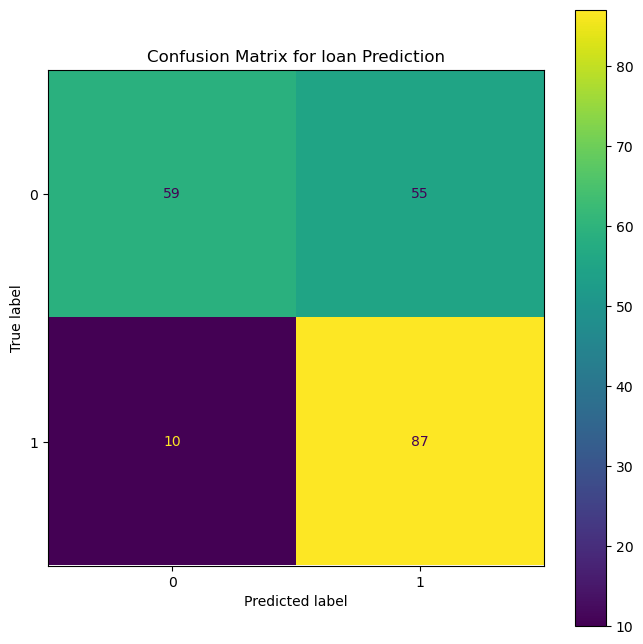

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_resampled_test)
print(classification_report(ytest,logistic_model.predict(X_resampled_test)))
print(confusion_matrix(ytest,logistic_model.predict(X_resampled_test)))
 
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,logistic_model.predict(X_resampled_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['0','1']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for loan Prediction')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

              precision    recall  f1-score   support

           0       0.96      0.41      0.58       114
           1       0.59      0.98      0.73        97

    accuracy                           0.67       211
   macro avg       0.77      0.70      0.66       211
weighted avg       0.79      0.67      0.65       211

[[47 67]
 [ 2 95]]


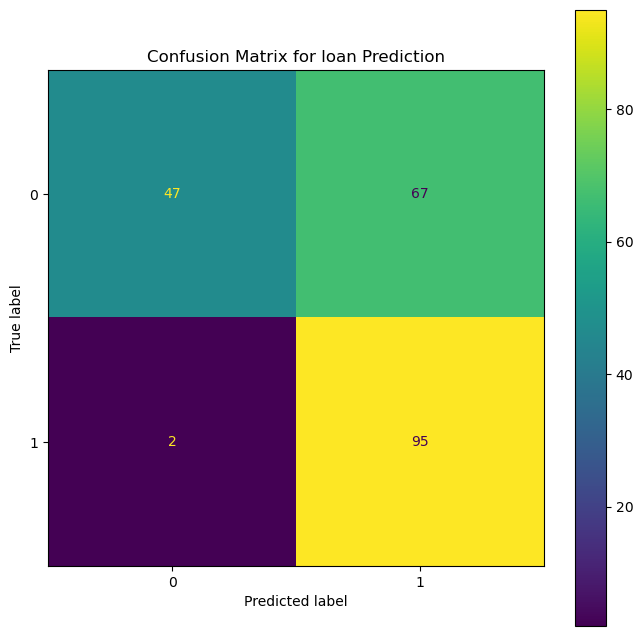

In [55]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_resampled_test)
print(classification_report(ytest,svc_model.predict(X_resampled_test)))
print(confusion_matrix(ytest,svc_model.predict(X_resampled_test)))
 
cm = confusion_matrix(ytest,svc_model.predict(X_resampled_test))

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['0','1']

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for loan Prediction')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       114
           1       0.74      0.69      0.71        97

    accuracy                           0.74       211
   macro avg       0.74      0.74      0.74       211
weighted avg       0.74      0.74      0.74       211

[[90 24]
 [30 67]]


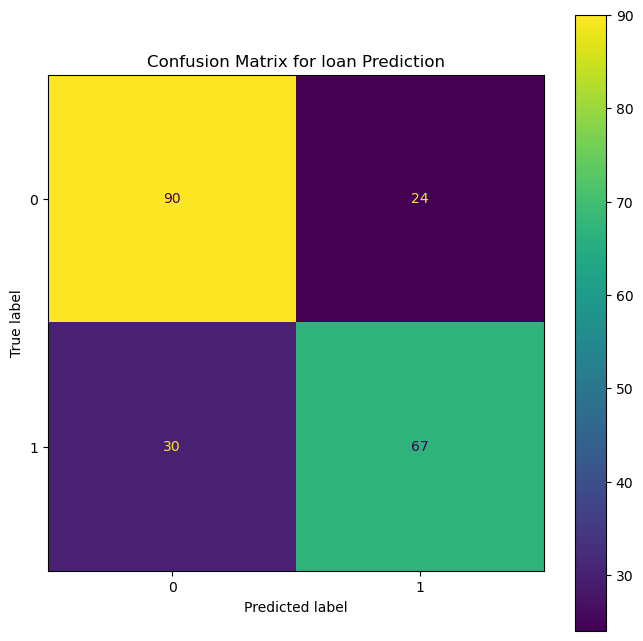

In [56]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_resampled_test)
print(classification_report(ytest,knn_model.predict(X_resampled_test)))
print(confusion_matrix(ytest,knn_model.predict(X_resampled_test)))
 
cm = confusion_matrix(ytest,knn_model.predict(X_resampled_test))

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['0','1']

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for loan Prediction')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [60]:
#KNN Prediciton
# Selecting the first row of the DataFrame for prediction
df_subset = X.iloc[8:9].copy()

# Extracting the actual loan status from the original DataFrame
actual_loan_status = y.iloc[0]

# Making predictions using the trained model
predicted_loan_status = knn_model.predict(df_subset)[0]

# Output the predicted and actual loan statuses
print("Predicted Loan Status:", predicted_loan_status)
print("Actual Loan Status:", actual_loan_status)

Predicted Loan Status: 1
Actual Loan Status: 1


In [61]:
#Logistic Model Prediciton
# Selecting the first row of the DataFrame for prediction
df_subset = X.iloc[8:9].copy()

# Extracting the actual loan status from the original DataFrame
actual_loan_status = y.iloc[0]

# Making predictions using the trained model
predicted_loan_status = logistic_model.predict(df_subset)[0]

# Output the predicted and actual loan statuses
print("Predicted Loan Status:", predicted_loan_status)
print("Actual Loan Status:", actual_loan_status)

Predicted Loan Status: 1
Actual Loan Status: 1


In [62]:
#SVM Prediction
# Selecting the first row of the DataFrame for prediction
df_subset = X.iloc[8:9].copy()

# Extracting the actual loan status from the original DataFrame
actual_loan_status = y.iloc[0]

# Making predictions using the trained model
predicted_loan_status = svc_model.predict(df_subset)[0]

# Output the predicted and actual loan statuses
print("Predicted Loan Status:", predicted_loan_status)
print("Actual Loan Status:", actual_loan_status)

Predicted Loan Status: 1
Actual Loan Status: 1
